In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
df=pd.read_csv('housing.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:
print(df.keys())

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


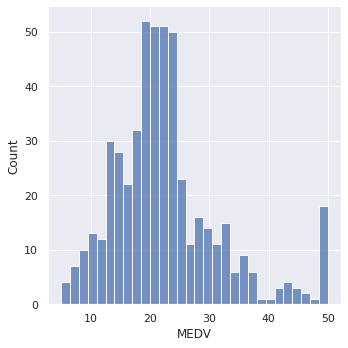

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(df['MEDV'],bins=30)
plt.show()

<Axes: >

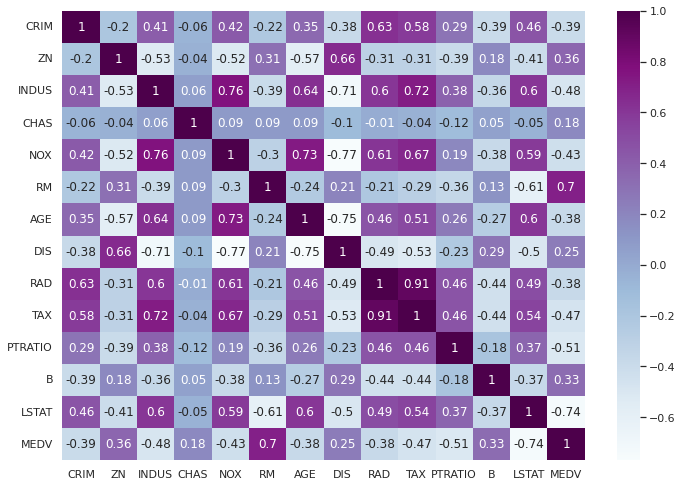

In [10]:
correlation_matrix=df.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True, cmap='BuPu')

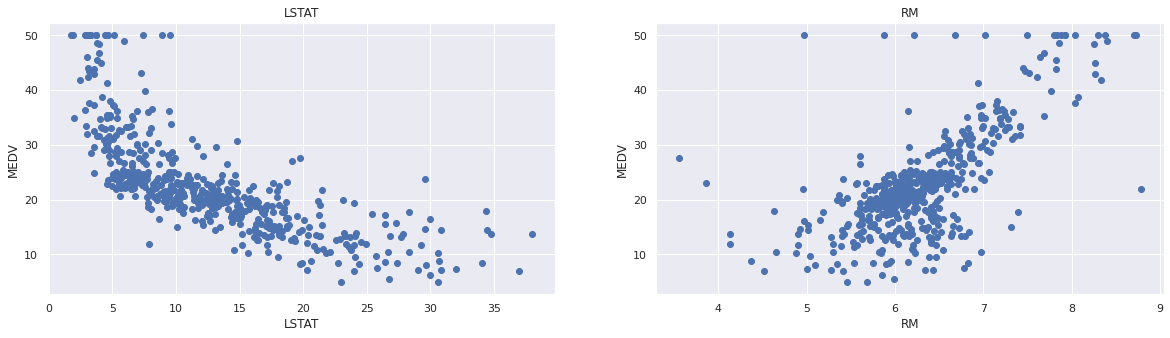

In [11]:
plt.figure(figsize=(20,5))

features=['LSTAT','RM']
target=df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1,len(features),i+1)
    x=df[col]
    y=target
    plt.scatter(x,y,marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [13]:
X=pd.DataFrame(np.c_[df['LSTAT'],df['RM']], columns=['LSTAT','RM'])
Y=df['MEDV']

In [15]:
from sklearn.model_selection import train_test_split

# splitting the data into training and testing data
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# creating a linear regression model
lin_model=LinearRegression()

# fit the model using the training data
lin_model.fit(X_train,Y_train)

LinearRegression()

In [18]:
# y_train_predict=lin_model.predict(X_train)
# rmse=(np.sqrt(mean_squared_error(Y_train,y_train_predict)))
# r2=r2_score(Y_train,y_train_predict)

# print("the model performance for training set")
# print("--------------------------------------")
# print('RMSE is {}'.format(rmse))
# print('R2 score is {}'.format(r2))
# print("\n")

# y_test_predict=lin_model.predict(X_test)
# rmse=(np.sqrt(mean_squared_error(Y_test,y_test_predict)))
# r2=re_score(Y_test,y_test_predict)

# print("The model performance for testing set")
# print('-------------------------------------')
# print("RMSE is {}".format(rmse))
# print("R2 score is {}".format(r2))

NameError: name 'r2_score' is not defined

In [22]:
# predict the target values for the test data
y_pred=lin_model.predict(X_train)

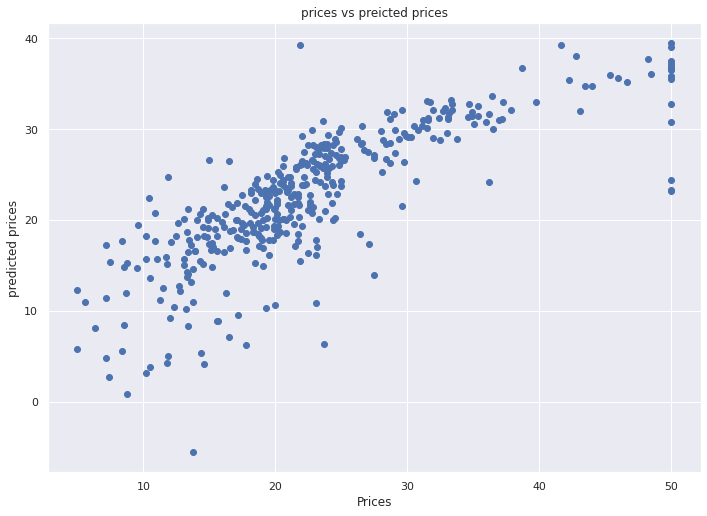

In [23]:
# predicting through scatter
plt.scatter(Y_train,y_pred)
plt.xlabel("Prices")
plt.ylabel("predicted prices")
plt.title("prices vs preicted prices")
plt.show()

In [25]:
# calculate the mean squared error and root mean squared values

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_train,y_pred)
mse

31.77722714032021

In [26]:
root_mse=mse**(1/2)
root_mse

5.637129335071195

In [27]:
root_mse

5.637129335071195